In [1]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime Library
from datetime import date

# Helper Functions
import acquire

### Background

#### Index
Thousands of indexes track the movements of various sectors, markets, and investment strategies on a daily basis, and are used to determine taht market's health and performance.

#### Index Fund
An <b>index fund</b> is a type of mutural fund or exchange-traded fund (ETF). It's made up of stocks or bonds attemting to earn the same return as a particular index.

Index funds are passively managed, which means that they typically hold waht's in the index (which rarely changes) to maximize returns and minimize costs. 

#### What is an ETF?
An ETF is a fund can be traded on an exchange like a stock, which means they can be bought and sold throughtout the trading day (unlike mutual funds, which are priced at the end of the trading day).

An ETF is a type of security that tracks an index, sector, commodity or other asset, but which can be purchased or sold on stock exchange the same as a regular stock.

ETF share prices fluctuate all day as the ETF is bought and sold and it is different from mutual funds that only trade once a day after the market closes.
#### How an ETF is structured? 
An ETF can be structured to track anything from the price of an individual commodity to a large and diverse collection of securities. 

ETFs can contain all types of investments including stocks, commodities, or bonds; some offter U.S. only holdings, while other are international. 

???Will the structure of ETF change over time???

#### Reference
- [Investing in Index Funds for Beginners](https://www.thebalance.com/investing-in-index-funds-for-beginners-356318)

### Data Acquisition

In [91]:
%%time
# Create a list of interested stocks
arks = ['ARKK', 'ARKQ', 'ARKW', 'ARKG', 'ARKF']

# Creata a list of benchmark indexes
references = ['^GSPC', '^DJI', '^IXIC', 'VOOG','TSLA']

# Define start and end date
start_date = '2014-09-30'
end_date = date.today()

# Acquire their adjusted closing prices from yahoo finance
df_arks = acquire.acquire_stock_data(arks+references, 'yahoo', start_date, end_date)

# Inspect the dataframe
print(df_arks.shape)
df_arks.head()

(1627, 10)
CPU times: user 720 ms, sys: 52.4 ms, total: 772 ms
Wall time: 5.68 s


,ARKK,ARKQ,ARKW,ARKG,ARKF,^GSPC,^DJI,^IXIC,VOOG,TSLA
Date,,,,,,,,,,
2014-09-30,NaN,18.632673,16.704393,NaN,NaN,1972.290039,17042.900391,4493.390137,87.922432,48.535999
2014-10-01,NaN,18.290478,16.337547,NaN,NaN,1946.160034,16804.710938,4422.089844,86.636726,48.048000
2014-10-02,NaN,18.407051,16.236435,NaN,NaN,1946.170044,16801.050781,4430.200195,86.563293,50.284000
2014-10-03,NaN,18.651476,16.829735,NaN,NaN,1967.900024,17009.689453,4475.620117,87.601006,51.042000
2014-10-06,NaN,18.529261,16.686008,NaN,NaN,1964.819946,16991.910156,4454.799805,87.408195,52.124001


In [92]:
# Make a copy of the dataframe
df = df_arks.copy()

In [93]:
# Print the concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1627 entries, 2014-09-30 to 2021-03-17
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ARKK    1604 non-null   float64
 1   ARKQ    1627 non-null   float64
 2   ARKW    1627 non-null   float64
 3   ARKG    1604 non-null   float64
 4   ARKF    534 non-null    float64
 5   ^GSPC   1627 non-null   float64
 6   ^DJI    1627 non-null   float64
 7   ^IXIC   1627 non-null   float64
 8   VOOG    1627 non-null   float64
 9   TSLA    1627 non-null   float64
dtypes: float64(10)
memory usage: 139.8 KB


**Takeaways**
1. Those five ETFs have different inception dates.

In [94]:
# Add a new column to compute the average of the 5 active ETFs
df = df.assign(arks_avg = df[arks].mean(axis=1))

# Inspect the new dataframe
df.tail()

,ARKK,ARKQ,ARKW,ARKG,ARKF,^GSPC,^DJI,^IXIC,VOOG,TSLA,arks_avg
Date,,,,,,,,,,,
2021-03-11,128.679993,86.720001,159.399994,93.199997,54.950001,3939.340088,32485.589844,13398.669922,232.820007,699.599976,104.589997
2021-03-12,126.680000,86.050003,157.479996,91.800003,54.270000,3943.340088,32778.640625,13319.860352,231.399994,693.729980,103.256001
2021-03-15,128.880005,87.620003,160.740005,93.860001,55.189999,3968.939941,32953.460938,13459.709961,233.360001,707.940002,105.258002
2021-03-16,126.019997,85.750000,157.929993,92.300003,54.950001,3962.709961,32825.949219,13471.570312,234.179993,676.880005,103.389999
2021-03-17,127.459999,87.360001,159.809998,92.989998,55.419998,3974.120117,33015.371094,13525.202148,234.580002,701.809998,104.607999


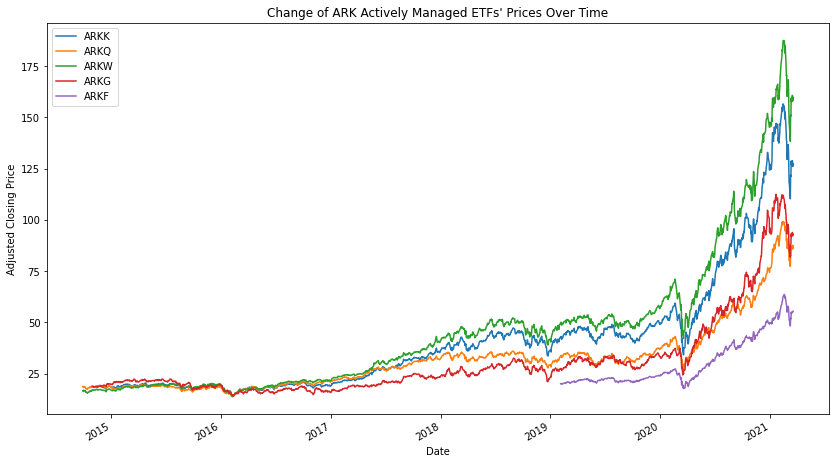

In [95]:
# Plot the prices of the 5 ETFs over time

df[arks].plot(figsize=(14,8))
plt.ylabel("Adjusted Closing Price")
plt.title("Change of ARK Actively Managed ETFs' Prices Over Time")
plt.show()

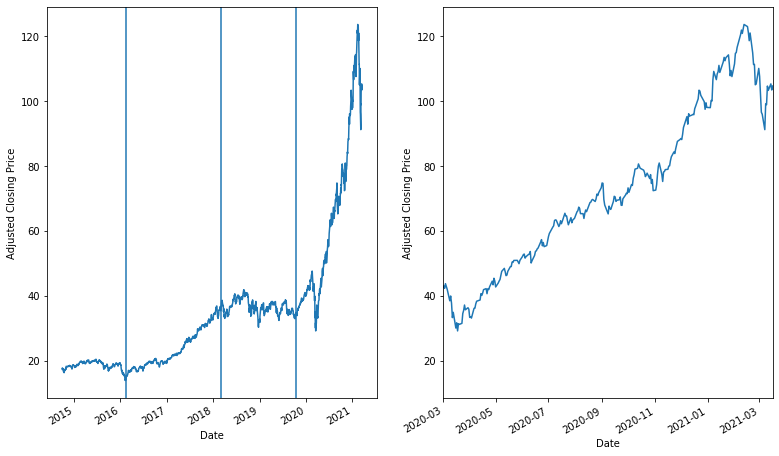

In [96]:
# Plot the mean over time and zoom in since the beginning of last March

# Set up the figure size
plt.figure(figsize=(13,8))

plt.subplot(121)
df.arks_avg.plot()
plt.ylabel("Adjusted Closing Price")
plt.axvline(x="2016-02-15")
plt.axvline(x="2018-03-01")
plt.axvline(x="2019-10-15")
# Extra plt.show() here will show the two plots in two rows. 

plt.subplot(122)
df.arks_avg.plot()
plt.ylabel("Adjusted Closing Price")
plt.xlim('2020-03-01', end_date)
plt.show()

**Takeaways**
1. The curve of the mean shows a flat-up-flat-up pattern. 
2. Since March 2020, the price of the ARK's ETFs increased about 2.5 folds on average. 

In [97]:
# Scale the adjusted closing prices and indexes using today's value as the reference
df_scaled = df.apply(lambda i: i/i.tail(1).values, axis=0)

# Inspect the scaled dataframe
df_scaled.tail()

,ARKK,ARKQ,ARKW,ARKG,ARKF,^GSPC,^DJI,^IXIC,VOOG,TSLA,arks_avg
Date,,,,,,,,,,,
2021-03-11,1.009572,0.992674,0.997434,1.002258,0.991519,0.991248,0.983953,0.990645,0.992497,0.996851,0.999828
2021-03-12,0.993880,0.985005,0.985420,0.987203,0.979249,0.992255,0.992830,0.984818,0.986444,0.988487,0.987076
2021-03-15,1.011141,1.002976,1.005819,1.009356,0.995850,0.998697,0.998125,0.995158,0.994799,1.008735,1.006214
2021-03-16,0.988702,0.981571,0.988236,0.992580,0.991519,0.997129,0.994263,0.996035,0.998295,0.964478,0.988357
2021-03-17,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


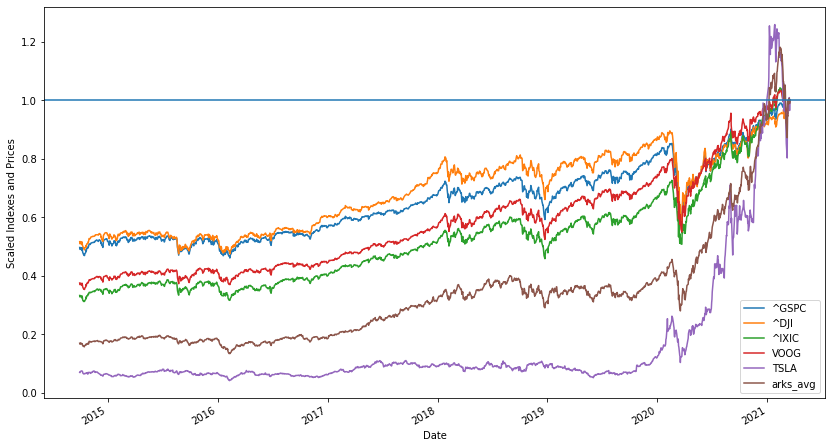

In [98]:
# Plot the scaled indexes and the mean of ETFs

cols = references + ['arks_avg']

df_scaled[cols].plot(figsize=(14,8))
plt.axhline(y=1.0)
plt.ylabel("Scaled Indexes and Prices")
plt.show()

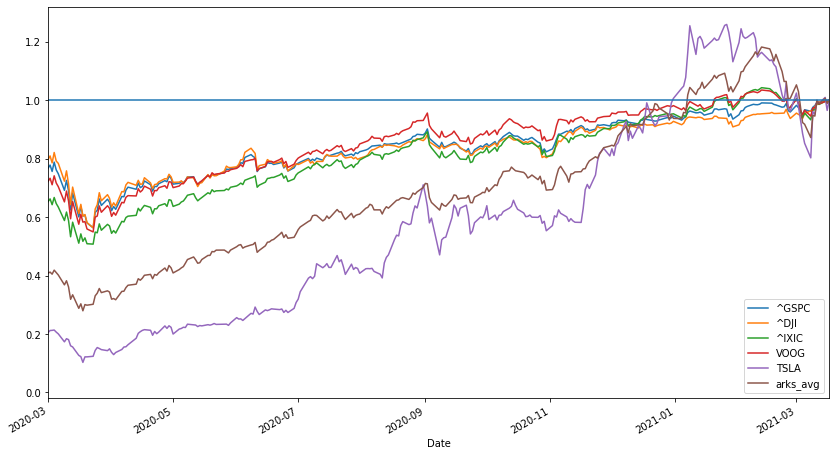

In [99]:
# Plot the scaled indexes and the mean of ETFs since March 2020

df_scaled[cols].plot(figsize=(14,8))
plt.axhline(y=1.0)
plt.xlim("2020-03-01", end_date)
plt.show()

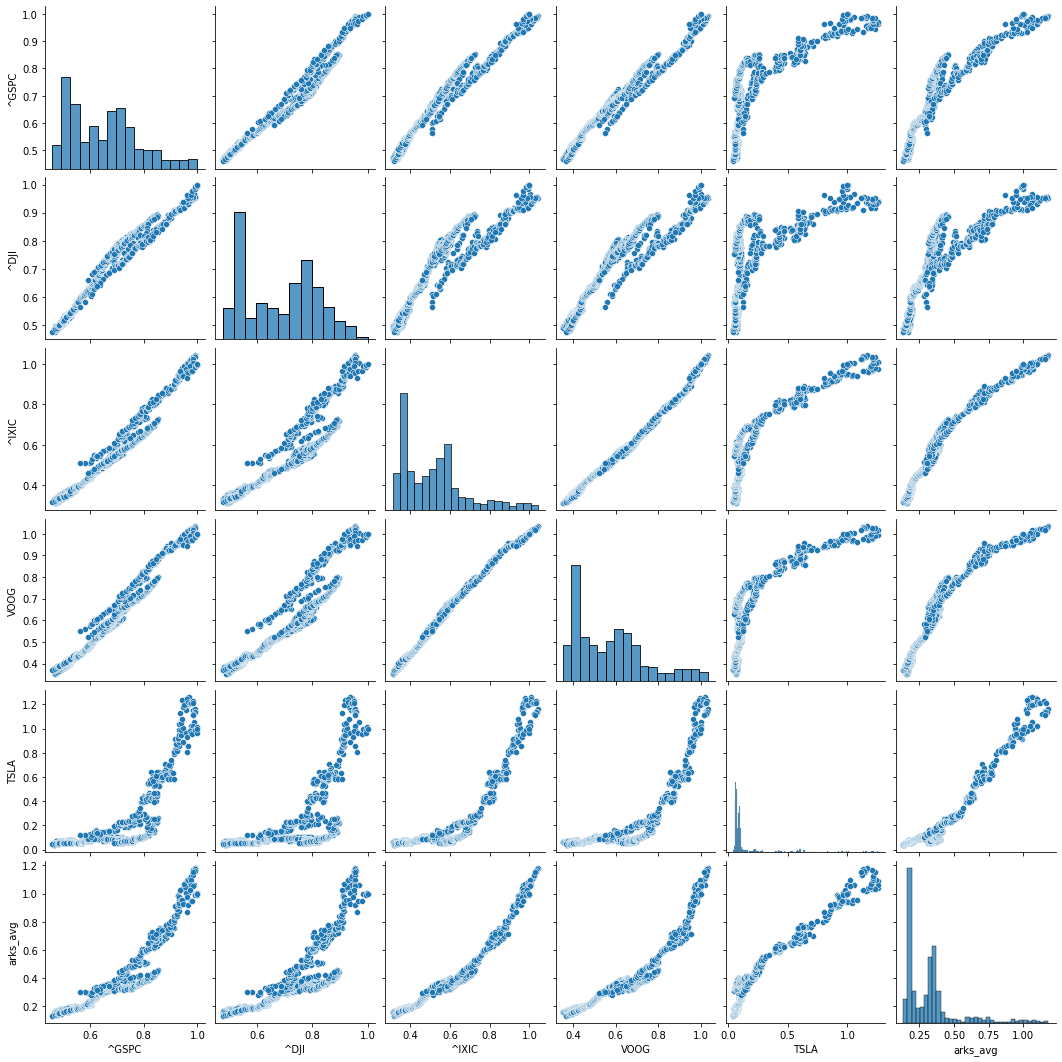

In [101]:
# Plot pairwise relationships in the dataset

sns.pairplot(df_scaled[cols], dropna=True)
plt.show()

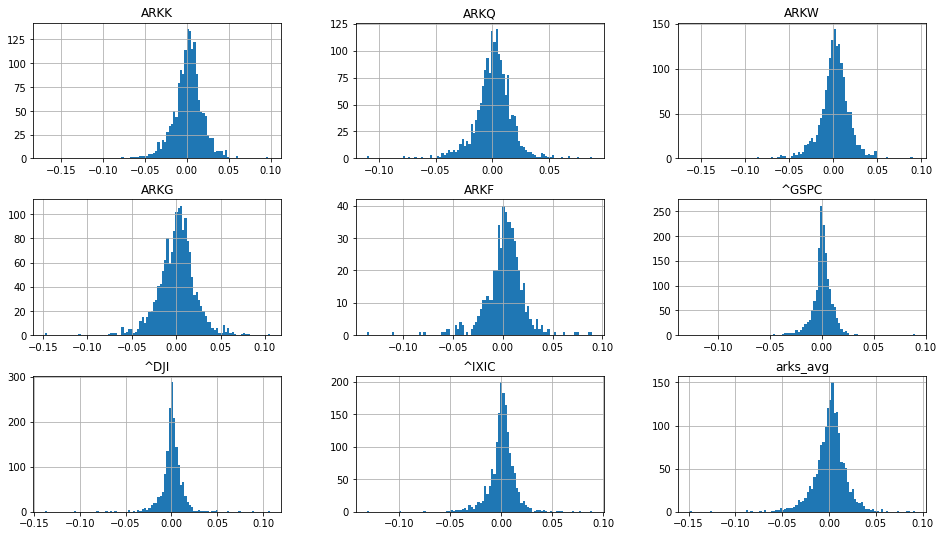

In [60]:
# Compute the daily returns of the ETFs

returns_d = np.log(df/df.shift(1))
returns_d.hist(figsize=(16,9), bins=100)
plt.show()